# Notebook 1: Neural ODE 2D

Este notebook implementa e treina Neural ODEs para aprender transformações em dados 2D.

## Objetivos:
1. Implementar VectorField e NeuralODE
2. Treinar em dataset 2D sintético (moons)
3. Visualizar trajetórias e vector fields
4. Analisar NFEs e comparar solvers


In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import torch
import torch.optim as optim
from src.models.neural_ode import NeuralODE
from src.models.vector_field import VectorField
from src.utils.datasets import Synthetic2D, get_dataloader
from src.utils.training import train_neural_ode, count_nfe
from src.utils.visualization import (
    plot_data_distribution,
    plot_trajectories,
    plot_transformation,
    plot_vector_field,
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


## 1. Carregar Dataset


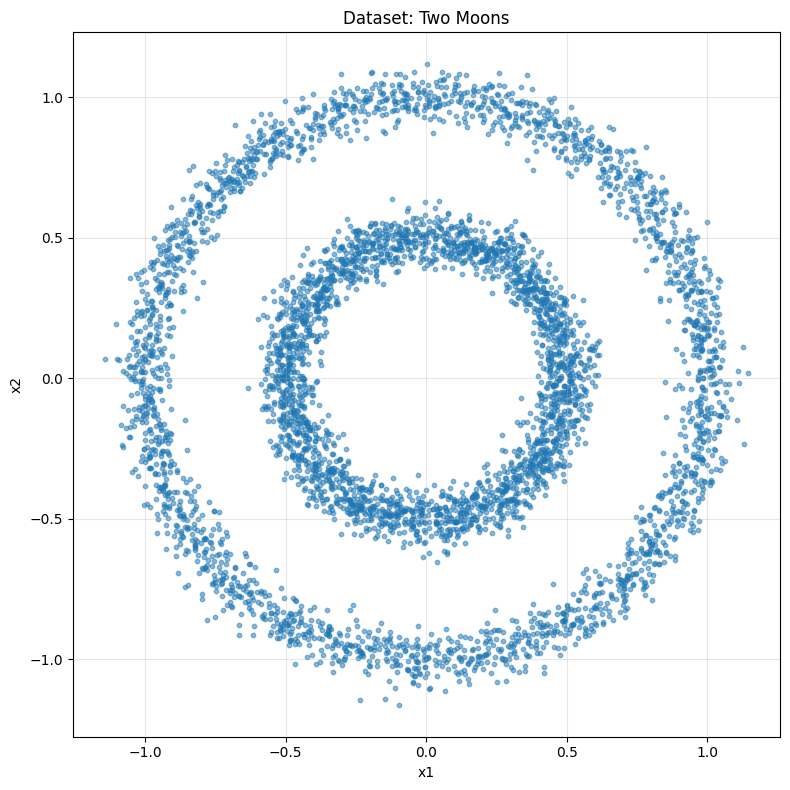

In [2]:
# Criar dataset
dataset = Synthetic2D(n_samples=5000, noise=0.05, dataset_type='circles')
dataloader = get_dataloader(dataset, batch_size=128, shuffle=True)

# Visualizar dados
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_data_distribution(dataset.data, ax=ax, title="Dataset: Two Moons")
plt.tight_layout()
plt.show()


## 2. Criar e Treinar Modelo


In [ ]:
# Criar modelo
vf = VectorField(features=2, hidden_dims=[64, 64], time_embed_dim=16)
model = NeuralODE(vf, solver='dopri5', rtol=1e-3, atol=1e-4).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Treinar
train_neural_ode(model, dataloader, optimizer, device, num_epochs=50)


Epoch 1/50:   0%|          | 0/40 [00:00<?, ?it/s]/home/lucas-barbosa/.virtualenvs/flow/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Epoch 1/50: 100%|██████████| 40/40 [00:02<00:00, 19.92it/s]


Epoch 1, Loss: 1.042898


Epoch 2/50: 100%|██████████| 40/40 [00:02<00:00, 19.36it/s]


Epoch 2, Loss: 0.416819


Epoch 3/50: 100%|██████████| 40/40 [00:04<00:00,  9.99it/s]


Epoch 3, Loss: 0.332584


Epoch 4/50: 100%|██████████| 40/40 [00:05<00:00,  7.88it/s]


Epoch 4, Loss: 0.323556


Epoch 5/50: 100%|██████████| 40/40 [00:04<00:00,  9.04it/s]


Epoch 5, Loss: 0.316413


Epoch 6/50: 100%|██████████| 40/40 [00:03<00:00, 10.55it/s]


Epoch 6, Loss: 0.320285


Epoch 7/50: 100%|██████████| 40/40 [00:05<00:00,  7.74it/s]


Epoch 7, Loss: 0.317967


Epoch 8/50: 100%|██████████| 40/40 [00:04<00:00,  8.08it/s]


Epoch 8, Loss: 0.315871


Epoch 9/50: 100%|██████████| 40/40 [00:05<00:00,  7.22it/s]


Epoch 9, Loss: 0.315160


Epoch 10/50: 100%|██████████| 40/40 [00:04<00:00,  8.73it/s]


Epoch 10, Loss: 0.318393


Epoch 11/50: 100%|██████████| 40/40 [00:05<00:00,  7.83it/s]


Epoch 11, Loss: 0.317368


Epoch 12/50: 100%|██████████| 40/40 [00:04<00:00,  8.83it/s]


Epoch 12, Loss: 0.315184


Epoch 13/50: 100%|██████████| 40/40 [00:05<00:00,  7.53it/s]


Epoch 13, Loss: 0.315520


Epoch 14/50: 100%|██████████| 40/40 [00:04<00:00,  9.09it/s]


Epoch 14, Loss: 0.317445


Epoch 15/50: 100%|██████████| 40/40 [00:05<00:00,  7.09it/s]


Epoch 15, Loss: 0.314343


Epoch 16/50: 100%|██████████| 40/40 [00:06<00:00,  6.19it/s]


Epoch 16, Loss: 0.313425


Epoch 17/50: 100%|██████████| 40/40 [00:04<00:00,  8.19it/s]


Epoch 17, Loss: 0.319786


Epoch 18/50: 100%|██████████| 40/40 [00:05<00:00,  6.81it/s]


Epoch 18, Loss: 0.315294


Epoch 19/50: 100%|██████████| 40/40 [00:05<00:00,  7.74it/s]


Epoch 19, Loss: 0.315494


Epoch 20/50: 100%|██████████| 40/40 [00:04<00:00,  9.13it/s]


Epoch 20, Loss: 0.318791


Epoch 21/50: 100%|██████████| 40/40 [00:05<00:00,  7.90it/s]


Epoch 21, Loss: 0.314775


Epoch 22/50: 100%|██████████| 40/40 [00:05<00:00,  7.51it/s]


Epoch 22, Loss: 0.314593


Epoch 23/50: 100%|██████████| 40/40 [00:05<00:00,  7.77it/s]


Epoch 23, Loss: 0.316701


Epoch 24/50: 100%|██████████| 40/40 [00:06<00:00,  6.63it/s]


Epoch 24, Loss: 0.315479


Epoch 25/50: 100%|██████████| 40/40 [00:05<00:00,  7.55it/s]


Epoch 25, Loss: 0.315902


Epoch 26/50: 100%|██████████| 40/40 [00:05<00:00,  7.17it/s]


Epoch 26, Loss: 0.314690


Epoch 27/50: 100%|██████████| 40/40 [00:07<00:00,  5.64it/s]


Epoch 27, Loss: 0.316351


Epoch 28/50:   2%|▎         | 1/40 [00:00<00:06,  5.85it/s]

## 3. Visualizar Trajetórias


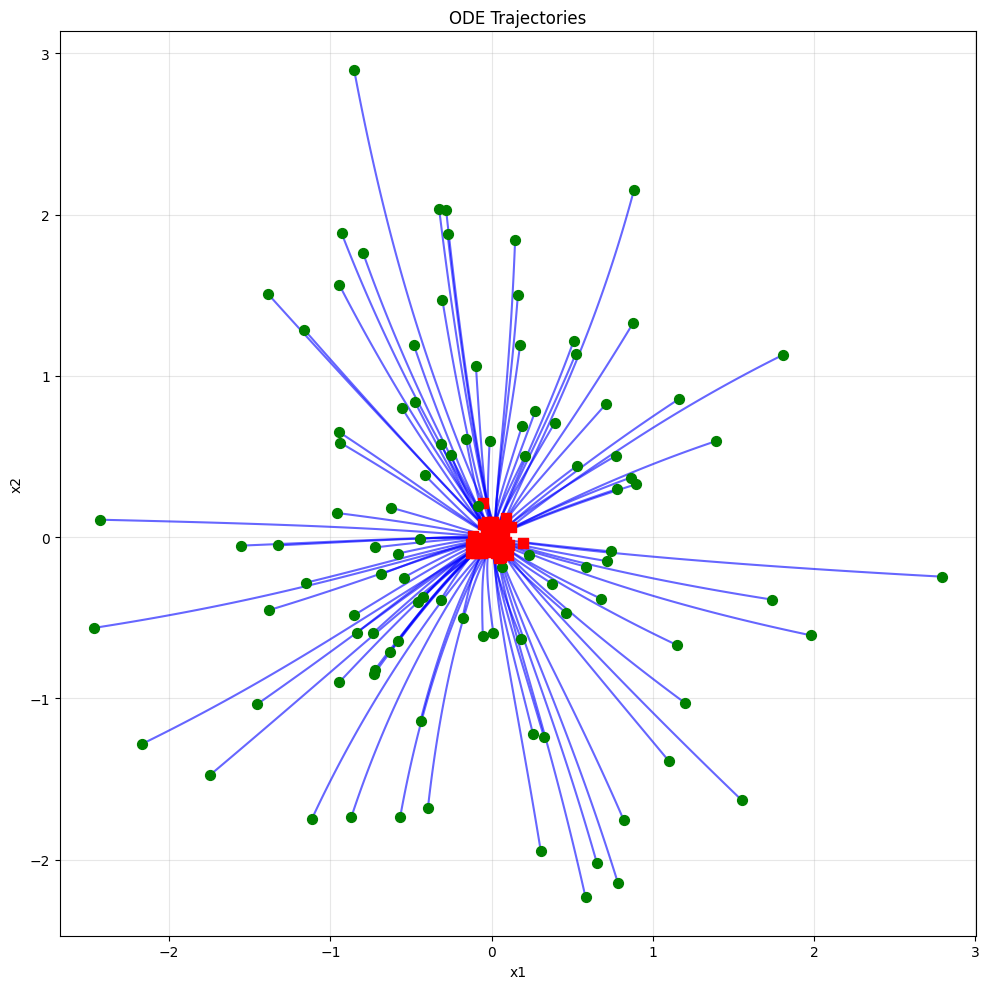

In [ ]:
sample_data = torch.randn(100, 2).to(device)
t_span = torch.linspace(0, 1, 100).to(device)

# Plotar trajetórias
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Primeiro, plotar a distribuição alvo (circles) para referência
plot_data_distribution(dataset.data, ax=ax, title="Trajectories and Target Distribution")
ax.scatter(dataset.data[:, 0].numpy(), dataset.data[:, 1].numpy(), 
           alpha=0.3, s=20, color='gray', label='Target data (circles)', zorder=1)

# Depois, plotar as trajetórias
plot_trajectories(model, sample_data, t_span=t_span, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()


## 4. Visualizar Vector Field


AttributeError: 'NeuralODE' object has no attribute 'device'

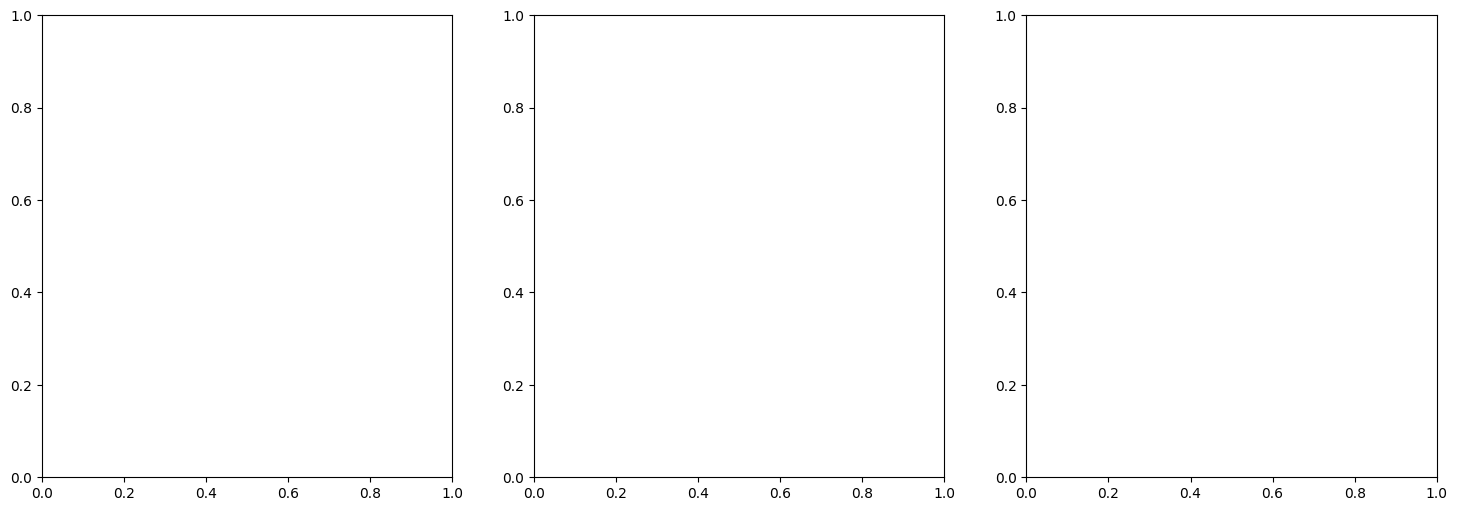

In [6]:
# Plotar vector field em diferentes tempos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, t in enumerate([0.0, 0.5, 1.0]):
    plot_vector_field(
        model,
        xlim=(-2, 2),
        ylim=(-2, 2),
        n_grid=20,
        t=t_span,
        ax=axes[i]
    )
plt.tight_layout()
plt.show()


## 5. Visualizar Transformação


In [ ]:
# Plotar transformação z ~ N(0,I) -> x
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_transformation(model, n_samples=1000, ax=ax)
plt.tight_layout()
plt.show()


## 6. Analisar NFEs (Number of Function Evaluations)


In [ ]:
# Comparar diferentes solvers
solvers = ['euler', 'rk4', 'dopri5']
nfe_results = {}

# Usar amostras de N(0, I) para contagem de NFEs
sample_batch = torch.randn(10, 2).to(device)

for solver in solvers:
    vf_test = VectorField(features=2, hidden_dims=[64, 64], time_embed_dim=16)
    model_test = NeuralODE(vf_test, solver=solver, rtol=1e-3, atol=1e-4).to(device)
    model_test.load_state_dict(model.state_dict())  # Usar mesmos pesos

    nfe = count_nfe(model_test, sample_batch)
    nfe_results[solver] = nfe
    print(f"{solver}: {nfe} NFEs")

# Comparar diferentes tolerâncias
tolerances = [(1e-2, 1e-3), (1e-3, 1e-4), (1e-4, 1e-5)]
nfe_tol_results = {}

for rtol, atol in tolerances:
    vf_test = VectorField(features=2, hidden_dims=[64, 64], time_embed_dim=16)
    model_test = NeuralODE(vf_test, solver='dopri5', rtol=rtol, atol=atol).to(device)
    model_test.load_state_dict(model.state_dict())

    nfe = count_nfe(model_test, sample_batch)
    nfe_tol_results[(rtol, atol)] = nfe
    print(f"rtol={rtol}, atol={atol}: {nfe} NFEs")
